In [32]:
path_1fs = "MBAR_estimates_justnativereference.csv"
path2_1fs = "cychex_simulated_observabldes_test.csv"

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import GPy
%matplotlib inline

In [34]:
df_1fs = pd.read_csv(path_1fs,sep=';').reset_index(drop=True)
df2_1fs = pd.read_csv(path2_1fs, sep=';').reset_index(drop=True)


In [35]:
# First thing I want to do is compare the simulations I've made to the MBAR estimates
# I'm matching based on the parameter state and there was an issue with some not matching up, so I'm rounding them all to the same decimal place first
df_1fs = df_1fs.round({'rmin_half values':4,'epsilon values':4})
df2_1fs = df2_1fs.round({'rmin_half_val':4,'eps_val':4})

# It's easier to do the matching on a single identifier, so I'm making a string out of the two parameters to match on   
df_1fs['state_coords'] = df_1fs['epsilon values'].astype(str) +','+ df_1fs['rmin_half values'].astype(str)
df2_1fs['state_coords'] = df2_1fs['eps_val'].astype(str)+','+df2_1fs['rmin_half_val'].astype(str)

# Only keep MBAR/simulation estimates that match in both
dfcomp_1fs = df_1fs[df_1fs.state_coords.isin(df2_1fs.state_coords)].drop_duplicates(['state_coords']).sort_values('N_eff',ascending=False).reset_index()
dfcomp_1fs = dfcomp_1fs.set_index('state_coords')
df2_1fs = df2_1fs.set_index('state_coords')

# index cleanup
dfcomp_1fs = dfcomp_1fs.reindex(df2_1fs.index)
df2_1fs['N_eff'] = dfcomp_1fs['N_eff']
dfcomp_1fs = dfcomp_1fs.dropna()
df2_1fs = df2_1fs.dropna()

# Sort in descending number of effectice samples
dfcomp_1fs = dfcomp_1fs.sort_values('N_eff',ascending=True)
df2_1fs = df2_1fs.sort_values('N_eff',ascending=True)

 C:\Users\Bryce\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\axes\_axes.py:2876: MatplotlibDeprecationWarning:Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.


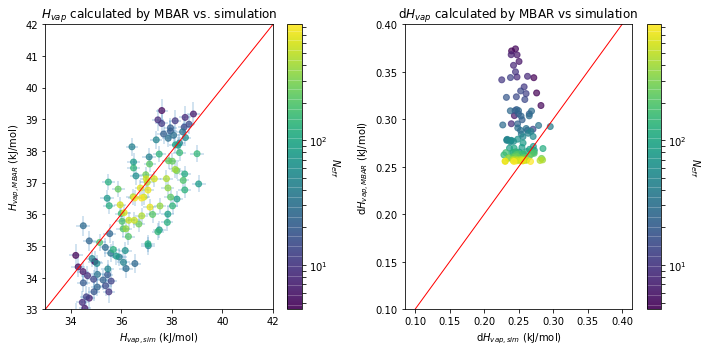

In [36]:
# Going to make a series of parity plots to see how the MBAR and simulation estimates compare
error_kwargs = {"lw":.4, "zorder":0}

fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
plt.scatter(df2_1fs['Hvap_sim (kJ/mol)'],dfcomp_1fs['Hvap_expect (kJ/mol)'],c=dfcomp_1fs['N_eff'],cmap='viridis',norm=LogNorm(),alpha=0.7)
plt.errorbar(df2_1fs['Hvap_sim (kJ/mol)'],dfcomp_1fs['Hvap_expect (kJ/mol)'],xerr=df2_1fs['dHvap_sim (kJ/mol)'],yerr=dfcomp_1fs['dHvap_expect (kJ/mol)'],fmt=None, marker=None, mew=0,**error_kwargs)
plt.plot([33,42],[33,42],color='red',label='Parity',linewidth=1)
plt.xlim([33,42])
plt.ylim([33,42])
plt.xlabel('$H_{vap,sim}$ (kJ/mol)')
plt.ylabel('$H_{vap,MBAR}$ (kJ/mol)')
plt.title('$H_{vap}$ calculated by MBAR vs. simulation')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$N_{eff}$', rotation=270)

plt.subplot(1,2,2)
plt.scatter(df2_1fs['dHvap_sim (kJ/mol)'],dfcomp_1fs['dHvap_expect (kJ/mol)'],c=dfcomp_1fs['N_eff'],cmap='viridis',norm=LogNorm(),alpha=0.7,)
plt.plot([0.1,0.4],[0.1,0.4],color='red',label='Parity',linewidth=1)
#plt.xlim([0.1,0.4])
plt.ylim([0.1,0.4])
plt.xlabel('d$H_{vap,sim}$ (kJ/mol)')
plt.ylabel('d$H_{vap,MBAR}$ (kJ/mol)')
plt.title('d$H_{vap}$ calculated by MBAR vs simulation')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$N_{eff}$', rotation=270)

plt.tight_layout()

 C:\Users\Bryce\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\axes\_axes.py:2876: MatplotlibDeprecationWarning:Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.


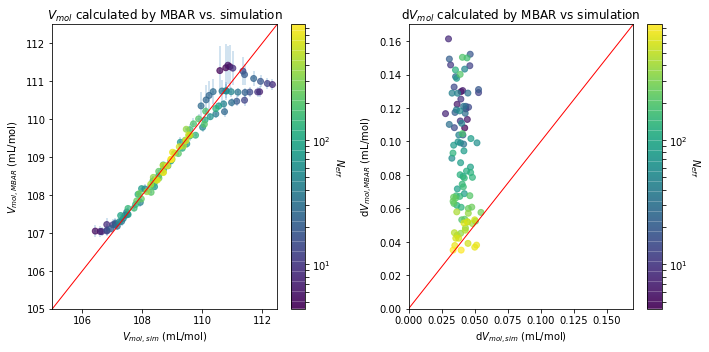

In [37]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
plt.scatter(df2_1fs['Vol_sim (mL/mol)'],dfcomp_1fs['Vol_bootstrap (mL/mol)'],c=dfcomp_1fs['N_eff'],cmap='viridis',norm=LogNorm(),label='MBAR vs Sim',alpha=0.7)
plt.errorbar(df2_1fs['Vol_sim (mL/mol)'],dfcomp_1fs['Vol_bootstrap (mL/mol)'],xerr=df2_1fs['dVol_sim (mL/mol)'],yerr=dfcomp_1fs['dVol_bootstrap (mL/mol)'],label='error bars',fmt=None, marker=None, mew=0,**error_kwargs)
plt.plot([105,112.5],[105,112.5],color='red',label='Parity',linewidth=1)
plt.xlim([105,112.5])
plt.ylim([105,112.5])
plt.xlabel('$V_{mol,sim}$ (mL/mol)')
plt.ylabel('$V_{mol,MBAR}$ (mL/mol)')
plt.title('$V_{mol}$ calculated by MBAR vs. simulation')
cbar = plt.colorbar() 
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$N_{eff}$', rotation=270)

plt.subplot(1,2,2)
plt.scatter(df2_1fs['dVol_sim (mL/mol)'],dfcomp_1fs['dVol_expect (mL/mol)'],c=dfcomp_1fs['N_eff'],cmap='viridis',norm=LogNorm(),alpha=0.7)
plt.plot([0.00,0.17],[0.00,0.17],color='red',label='Parity',linewidth=1)
plt.xlim([0.00,0.17])
plt.ylim([0.00,0.17])
plt.xlabel('d$V_{mol,sim}$ (mL/mol)')
plt.ylabel('d$V_{mol,MBAR}$ (mL/mol)')
plt.title('d$V_{mol}$ calculated by MBAR vs simulation')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$N_{eff}$', rotation=270)

plt.tight_layout()

In [43]:
# Going to drop the number of effective samples less than 50

dfcomp_1fs = dfcomp_1fs[dfcomp_1fs['N_eff']>=50]
df2_1fs = df2_1fs[df2_1fs['N_eff']>=50]

In [44]:
# Let's make the GP regressions!

Optimization restart 1/10, f = -6.5506534391194435
Optimization restart 2/10, f = -6.550653439056447
Optimization restart 3/10, f = -6.550653438239692
Optimization restart 4/10, f = -6.550653439040246
Optimization restart 5/10, f = -6.5506534368737945
Optimization restart 6/10, f = -6.5506534391311675
Optimization restart 7/10, f = 242.9629599977193
Optimization restart 8/10, f = -6.550653439184465
Optimization restart 9/10, f = -6.5506534391277


 C:\Users\Bryce\AppData\Local\conda\conda\envs\my_root\lib\site-packages\GPy\kern\src\rbf.py:43: RuntimeWarning:overflow encountered in square


Optimization restart 10/10, f = -6.550653439099307


 C:\Users\Bryce\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


gp.,value,constraints,priors
rbf.variance,22276.9279118,+ve,
rbf.lengthscale,0.775694957384,+ve,
het_Gauss.variance,"(63, 1)",+ve fixed,


 C:\Users\Bryce\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


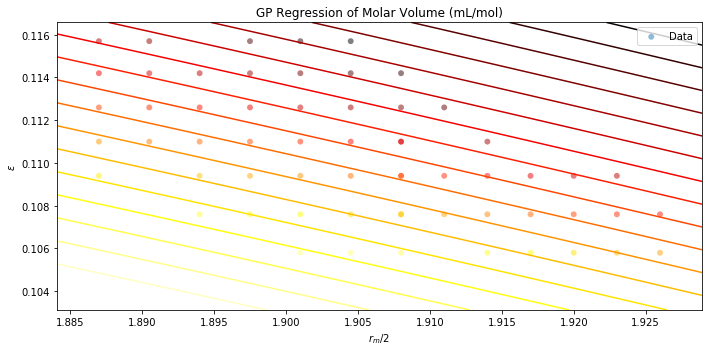

In [45]:
# sample inputs and outputs
X = np.zeros([len(dfcomp_1fs['epsilon values']),2],float)
Y_vol = np.zeros([len(dfcomp_1fs['epsilon values']),1],float)
dY_vol = np.zeros([len(dfcomp_1fs['epsilon values']),1],float)
X[:,1] = dfcomp_1fs['epsilon values']
X[:,0] = dfcomp_1fs['rmin_half values']
Y_vol[:,0] = dfcomp_1fs['Vol_expect (mL/mol)']
dY_vol[:,0] = dfcomp_1fs['dVol_expect (mL/mol)']

# define kernel
ker = GPy.kern.RBF(2)

# create simple GP model
m_vol = GPy.models.GPHeteroscedasticRegression(X,Y_vol,ker)#,dY_vol)
m_vol['.*het_Gauss.variance'] = abs(dY_vol)[:] #Set the noise parameters to the error in Y
m_vol.het_Gauss.variance.fix() #We can fix the noise term, since we already know it

# optimize and plot
m_vol.optimize_restarts(num_restarts = 10)
fig = m_vol.plot(figsize=(10,5))
plt.xlabel(r"$r_m / 2$")
plt.ylabel(r"$\epsilon$")
plt.title("GP Regression of Molar Volume (mL/mol)")
display(m_vol)

Optimization restart 1/10, f = 30.829007436653036
Optimization restart 2/10, f = 30.829007436633134
Optimization restart 3/10, f = 30.8290074366141
Optimization restart 4/10, f = 30.829007436628647
Optimization restart 5/10, f = 30.829007436611654
Optimization restart 6/10, f = 30.82900743661054
Optimization restart 7/10, f = 30.82900743660795
Optimization restart 8/10, f = 30.82900743660868
Optimization restart 9/10, f = 30.829007436617548
Optimization restart 10/10, f = 30.82900743661525


 C:\Users\Bryce\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


gp.,value,constraints,priors
rbf.variance,3321.7441065,+ve,
rbf.lengthscale,0.280356555921,+ve,
het_Gauss.variance,"(63, 1)",+ve fixed,


 C:\Users\Bryce\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


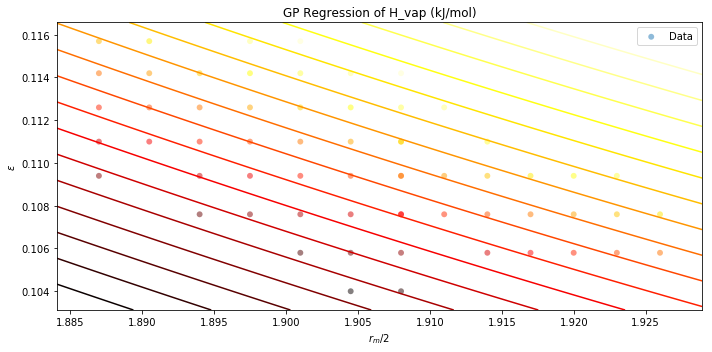

In [46]:
# sample inputs and outputs
X = np.zeros([len(dfcomp_1fs['epsilon values']),2],float)
Y_hvap = np.zeros([len(dfcomp_1fs['epsilon values']),1],float)
dY_hvap = np.zeros([len(dfcomp_1fs['epsilon values']),1],float)
X[:,1] = dfcomp_1fs['epsilon values']
X[:,0] = dfcomp_1fs['rmin_half values']
Y_hvap = dfcomp_1fs['Hvap_expect (kJ/mol)'][:,None]
dY_hvap = dfcomp_1fs['dHvap_expect (kJ/mol)'][:,None]

# define kernel
ker = GPy.kern.RBF(2)

# create simple GP model
m_hvap = GPy.models.GPHeteroscedasticRegression(X,Y_hvap,ker)
m_hvap['.*het_Gauss.variance'] = abs(dY_hvap)[:] #Set the noise parameters to the error in Y
m_hvap.het_Gauss.variance.fix() #We can fix the noise term, since we already know it

# optimize and plot
m_hvap.optimize_restarts(num_restarts = 10)
fig = m_hvap.plot(figsize=(10,5))
plt.xlabel(r"$r_m / 2$")
plt.ylabel(r"$\epsilon$")
plt.title("GP Regression of H_vap (kJ/mol)")
display(m_hvap)

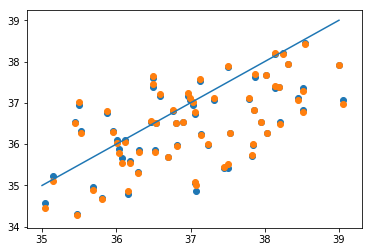

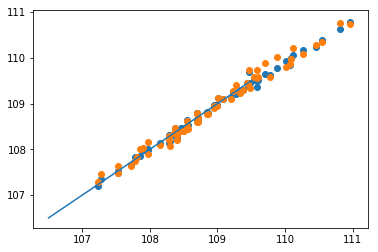

In [47]:
# How do the simulations and GP predictions compare?
Hvap_GP_ = m_hvap.predict(X, include_likelihood=False)
Vol_GP_ = m_vol.predict(X,include_likelihood=False)

Hvap_GP = []
Vol_GP = []

for i in Hvap_GP_[0]:
    Hvap_GP.append(i[0])
for i in Vol_GP_[0]:
    Vol_GP.append(i[0])
    
dfcomp_1fs['Hvap_GP (kJ/mol)'] = Hvap_GP
dfcomp_1fs['dev_Hvap_expect_GP (kJ/mol)'] = dfcomp_1fs['Hvap_GP (kJ/mol)'] - dfcomp_1fs['Hvap_expect (kJ/mol)']
dfcomp_1fs['Vol_GP (mL/mol)'] = Vol_GP
dfcomp_1fs['dev_Vol_expect_GP (mL/mol)'] = dfcomp_1fs['Vol_GP (mL/mol)'] - dfcomp_1fs['Vol_expect (mL/mol)']

plt.figure(1)
plt.scatter(df2_1fs['Hvap_sim (kJ/mol)'],dfcomp_1fs['Hvap_GP (kJ/mol)'])
plt.scatter(df2_1fs['Hvap_sim (kJ/mol)'],dfcomp_1fs['Hvap_expect (kJ/mol)'])
plt.plot([35,39],[35,39])

plt.figure(2)
plt.scatter(df2_1fs['Vol_sim (mL/mol)'],dfcomp_1fs['Vol_GP (mL/mol)'])
plt.scatter(df2_1fs['Vol_sim (mL/mol)'],dfcomp_1fs['Vol_expect (mL/mol)'])
plt.plot([106.5,109.5],[106.5,109.5])

In [48]:
# Well enough for demonstration 

In [49]:
# Finally we'll use the GPs to sample from our posterior!

In [50]:
def Vol(eps_,rmin_half_):
    X_ = np.zeros([1,2],float)
    X_[:,0] = rmin_half_
    X_[:,1] = eps_
    return float(m_vol.predict(X_,include_likelihood=False)[0][0][0])

def Hvap(eps_,rmin_half_):
    X_ = np.zeros([1,2],float)
    X_[:,0] = rmin_half_
    X_[:,1] = eps_
    return float(m_hvap.predict(X_,include_likelihood=False)[0][0][0])

# Data from ThermoML
y_ = pd.DataFrame({'Vol (mL/mol)':[108.09],'Hvap (kJ/mol)':[33.1]})
yerr_= pd.DataFrame({'Vol_std (mL/mol)':[0.10809],'Hvap_std (kJ/mol)':[0.4]})

In [51]:
# Define our probability models

def lnlike(theta, y, yerr):
    eps, rmin_half = theta
    V_model = Vol(eps,rmin_half)
    Hvap_model = Hvap(eps,rmin_half)
    return -(1./2.)*np.log(2.*np.pi) - (1./2.)*np.log(yerr['Vol_std (mL/mol)'].item()**2) - (1./(2.*yerr['Vol_std (mL/mol)'].item()**2))*(y['Vol (mL/mol)'].item()-V_model)**2 + -(1./2.)*np.log(2.*np.pi) - (1./2.)*np.log(yerr['Hvap_std (kJ/mol)'].item()**2) - (1./(2.*yerr['Hvap_std (kJ/mol)'].item()**2))*(y['Hvap (kJ/mol)'].item()-Hvap_model)**2
# TODO: Incorporate model error into likelihood calculation

def lnprior(theta):
    eps, rmin_half = theta
    if np.min(dfcomp_1fs['epsilon values']) < eps < np.max(dfcomp_1fs['epsilon values']) and np.min(dfcomp_1fs['rmin_half values']) < rmin_half < np.max(dfcomp_1fs['rmin_half values']):
        return 0.0
    return -np.inf

def lnprob(theta, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, y, yerr)

In [52]:
ndim, nwalkers = 2, 500
pos0 = [np.array([0.106,1.915]) + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
# Optimizing the walker positions? I did something pretty arbitrary.

import emcee

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(y_, yerr_))

#burnin steps
print("Begin burnin")
%time pos, prob, state = sampler.run_mcmc(pos0, 100)
sampler.reset()


#Production steps
print("Begin production")
%time sampler.run_mcmc(pos, 1000)

Begin burnin
Wall time: 45.7 s
Begin production
Wall time: 6min 46s


(array([[ 0.11457628,  1.8880435 ],
        [ 0.11497528,  1.88716165],
        [ 0.11443166,  1.8882066 ],
        [ 0.11421217,  1.88725023],
        [ 0.11482514,  1.88842075],
        [ 0.11472661,  1.88837982],
        [ 0.11431008,  1.88728275],
        [ 0.11448063,  1.88784945],
        [ 0.11373912,  1.8879868 ],
        [ 0.11389663,  1.88744746],
        [ 0.11465613,  1.88775957],
        [ 0.1145575 ,  1.88791423],
        [ 0.11349872,  1.88766909],
        [ 0.11393602,  1.88760335],
        [ 0.11400229,  1.88787698],
        [ 0.11422768,  1.89056367],
        [ 0.11457458,  1.8872498 ],
        [ 0.11410802,  1.88828833],
        [ 0.11440962,  1.88876761],
        [ 0.11403684,  1.88721573],
        [ 0.11371839,  1.88872125],
        [ 0.11424177,  1.88773316],
        [ 0.11425289,  1.88806899],
        [ 0.11415617,  1.88845317],
        [ 0.11441015,  1.88775148],
        [ 0.11368882,  1.89025752],
        [ 0.11439882,  1.88865254],
        [ 0.11397596,  1.887

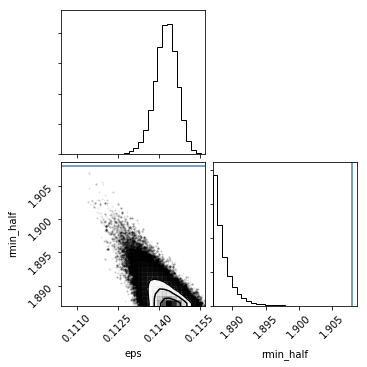

In [53]:
# Let's plot our posterior!
samples = sampler.chain[:, :, :].reshape((-1, ndim))

import corner
fig = corner.corner(samples, bins=30, labels=["eps", "rmin_half"],
                      truths=[0.1094, 1.9080],plot_density=True)

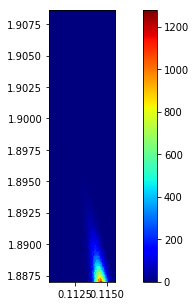

152 0
0.114434737551 1.88700000886


In [54]:
# Now let's find the maximum
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from os import getcwd
from os.path import join, realpath, dirname

# Path to dir where this code exists.
samples = sampler.flatchain

eps = samples[:,0]
rmin = samples[:,1]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

epsmin, epsmax = min(eps), max(eps)
rminmin, rminmax = min(rmin), max(rmin)
rang = [[epsmin, epsmax], [rminmin, rminmax]]

binsxy = [((epsmax - epsmin) / 20.), ((rminmax - rminmin) / 20.)]

H, xedges, yedges = np.histogram2d(eps, rmin, range=rang, bins=200)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
cp = ax.imshow(H.transpose()[::-1], interpolation='nearest', extent=extent, cmap=cm.jet)
fig.colorbar(cp)

plt.show()

x_cent, y_cent = np.unravel_index(H.argmax(), H.shape)
print(x_cent, y_cent)
print(xedges[x_cent], yedges[y_cent]) # maximum